# **Predicting the Price of Health 🏥 Can Your Model Diagnose the Cost? 🧐**

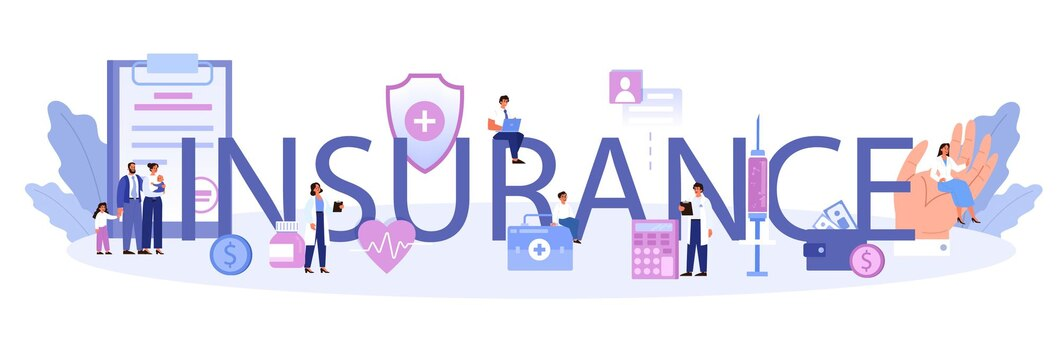

> Welcome to the Medical Insurance Costs Dataset, where data meets dollars and your task is to predict just how much it costs to stay healthy (or not-so-healthy). This dataset dives into the lives of patients, capturing their age, BMI, lifestyle habits, and even their region. Your mission? Build models that predict their medical insurance costs—whether they’re an active non-smoker or a junk-food-loving chain smoker with sky-high expenses. 🏥💸

But wait! Life is not linear, and neither are insurance costs. With Polynomial Regression, can you untangle the complex web of health data? Or will you stick to Multiple Linear Regression and hope for the best? The challenge is on!

## **What’s in the Medical Records?**


**1. age**
 * Does growing older mean growing costs?

**2. sex**
 * Does gender impact insurance premiums?

**3. bmi**
 * Body Mass Index—a simple metric or the ultimate cost predictor?

**4. children**
 * How many dependents add to the bill?

**5. smoker**
 * The all-important lifestyle habit: smoker or non-smoker?

**6. region**
 * Where you live matters—insurance isn’t the same across regions.

**7. charges**
 * The final bill. This is the target variable, representing individual medical insurance costs.


# **Assignment Tasks** 📄

**1. Data Exploration and Preprocessing**
 1. **Load the Dataset**
  * Import the dataset into a pandas DataFrame.

 2. **Explore the Data**
  * Summarize the dataset
     * Key statistics for numerical features like bmi, age, and charges.
     * Distribution of the categorical variables (sex, smoker, region).
 3. **Visualize Relationships**
  * Plot scatterplots to examine relationships between predictors and charges.

 4. **One-Hot Encode Categorical Features**
  * Convert sex, smoker, and region into numerical features using one-hot encoding.

 5. **Split the Data**
  * Divide the dataset into training (80%) and testing (20%) sets.




**2. Implement Multiple Linear Regression**
 1. **Train a Multiple Linear Regression Model**
  * Use Sklearn’s `LinearRegression` to fit the model to the training data.

 2. **Interpret Coefficients**
  * Analyze the impact of each predictor on insurance charges.





**3. Implement Polynomial Regression**
 1. **Add Polynomial Features**
  * Use Sklearn’s PolynomialFeatures to add interaction terms and higher-degree terms to the predictors.

 2. **Train a Polynomial Regression Model**
  * Fit the polynomial features to a LinearRegression model.

 3. **Compare with Multiple Linear Regression**
  * Evaluate if the polynomial model improves performance over the linear model.


**3. Model Evaluation**
 1. **Performance Metrics**
  * Evaluate the model using
      * Mean Absolute Error (MAE)
      * Mean Squared Error (MSE)
      * Root Mean Squared Error (RMSE)
      * R² Score
 2. **Visualize Predictions**
  * Plot predicted vs. actual `charges` for both models.


# **Cost Check-Up ⚕ Predicting Medical Bills with Multi & Polynomial Regression!**

> Dive into the world of medical expenses and explore how features like age, BMI, and smoking habits contribute to insurance costs. Build and compare Multiple and Polynomial Regression models to uncover nonlinear relationships. Can your model diagnose the costs accurately, or will the complexity of human health stump it? Let’s find out! 🏥📈

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
### Check Nulls
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
### Check duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
numerical_cols = df.select_dtypes(include='number')
categorical_cols = df.select_dtypes(exclude='number')

In [ ]:
### Numerical Columns
numerical_cols.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


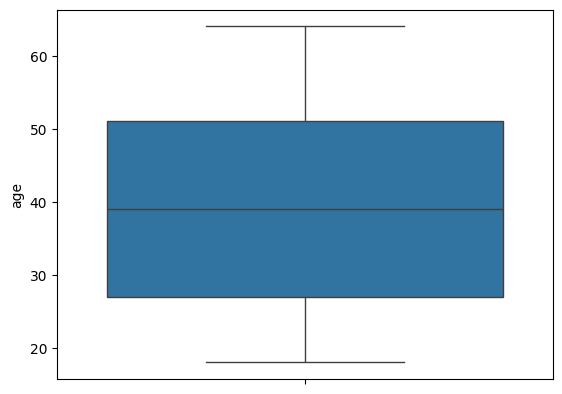

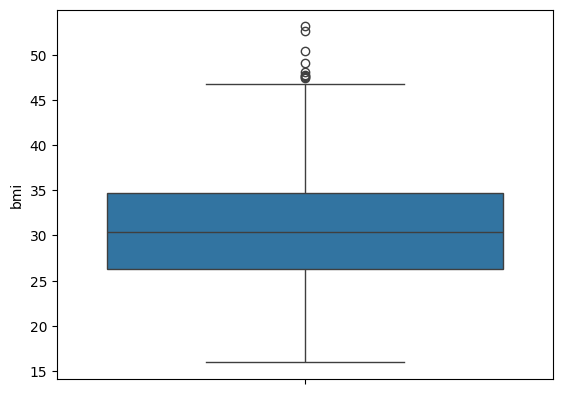

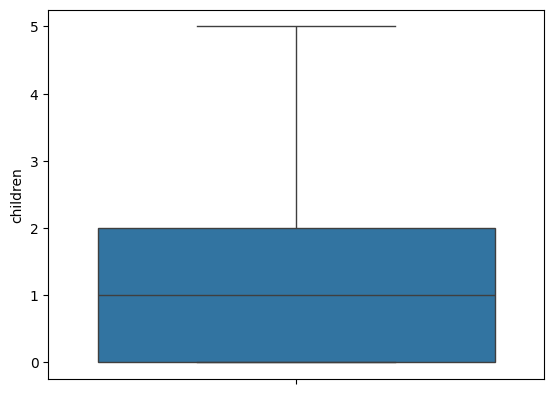

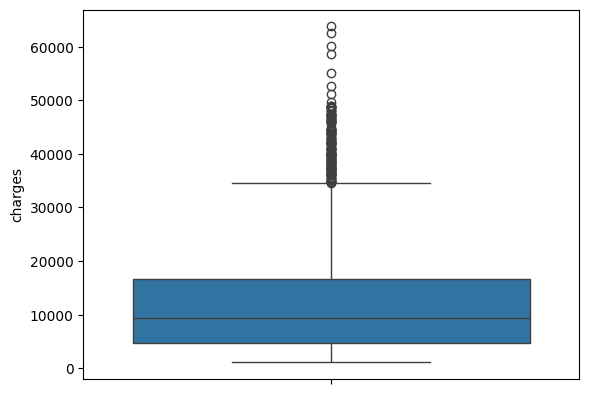

In [ ]:
### check outliers
for col_name in numerical_cols.columns:
  sns.boxplot(numerical_cols[col_name])
  plt.show()

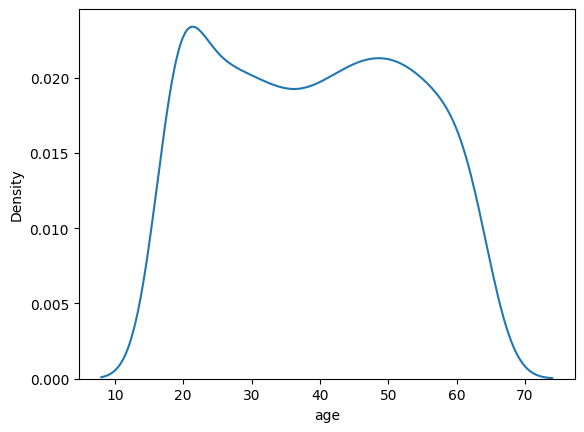

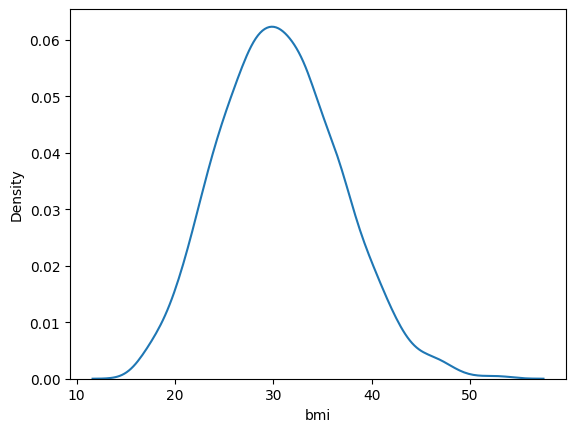

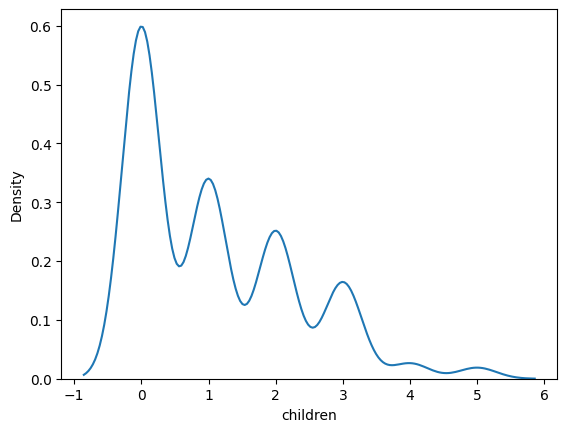

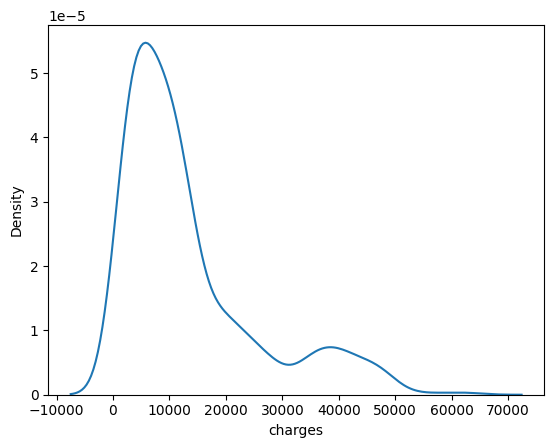

In [ ]:
for col_name in numerical_cols.columns :
  sns.kdeplot(numerical_cols[col_name])
  plt.show()

In [ ]:
### فقره الاسئله

<Axes: xlabel='age', ylabel='charges'>

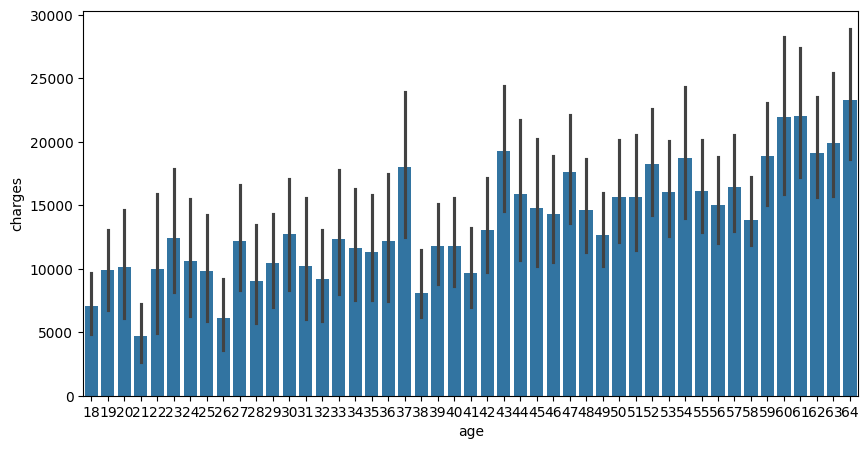

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='charges',data=df)

<Axes: >

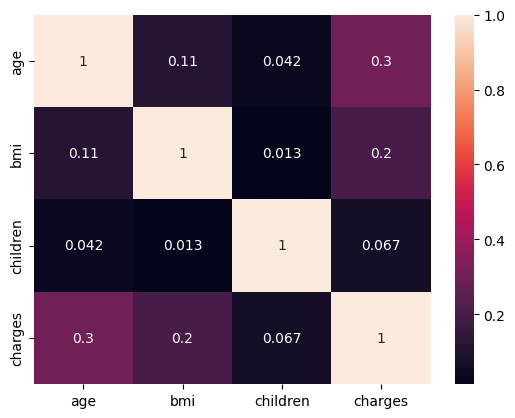

In [ ]:
cor_matrix = numerical_cols.corr()
sns.heatmap(cor_matrix,annot=True)

<Axes: xlabel='smoker', ylabel='charges'>

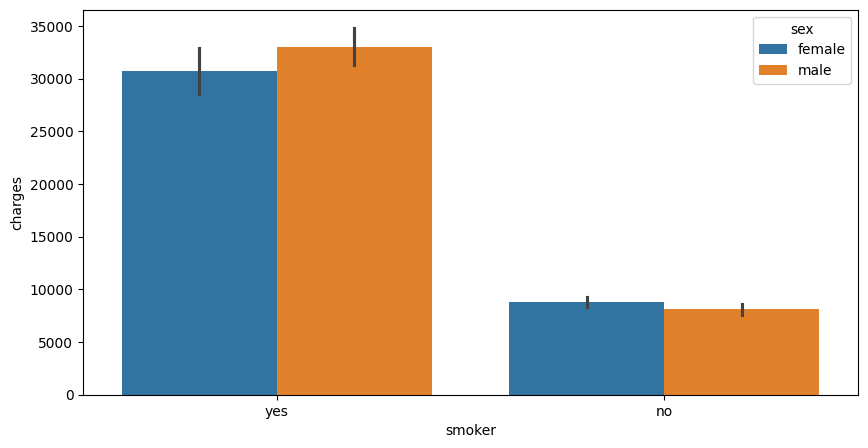

In [ ]:
### Relation between smoking & charges
plt.figure(figsize=(10,5))
sns.barplot(x='smoker',y='charges',data=df,hue='sex')

<Axes: xlabel='sex', ylabel='bmi'>

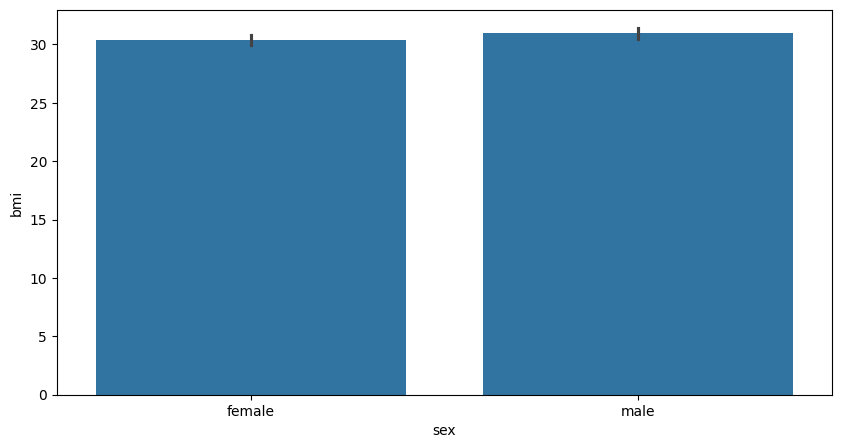

In [ ]:
### relation between bmi & sex
plt.figure(figsize=(10,5))
sns.barplot(x='sex',y='bmi',data=df)


<Axes: xlabel='bmi', ylabel='charges'>

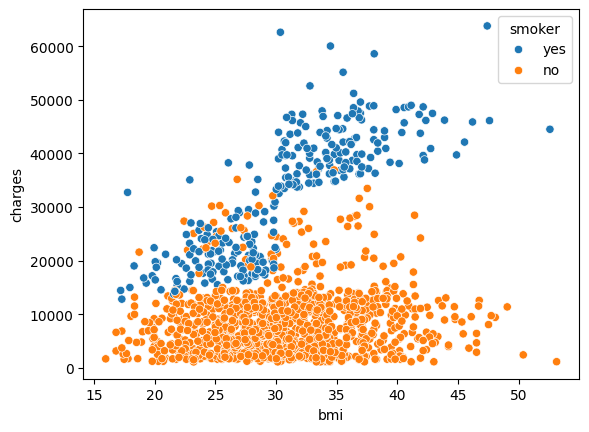

In [ ]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

In [ ]:
categorical_cols

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
### Split data to train / test

from sklearn.model_selection import train_test_split
x = df.drop('charges',axis=1)
y = df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
### Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[['sex','smoker','region']])

OneHotEncoder()

In [ ]:
x = pd.DataFrame([[1,2,3],
              [4,5,6]])

y = pd.DataFrame([[1,2,3],
              [4,5,6]])

x.reset_index(drop=True)

,0,1,2
0,1,2,3
1,4,5,6


In [ ]:
temp = ohe.transform(x_train[['sex','smoker','region']]).toarray()
temp = pd.DataFrame(temp,columns=ohe.get_feature_names_out())
x_train  = pd.concat([x_train.reset_index(drop=True),temp],axis=1 )


In [ ]:
x_train.drop(['sex','smoker','region'], axis=1, inplace=True)

In [ ]:
temp = ohe.transform(x_test[['sex','smoker','region']]).toarray()
temp = pd.DataFrame(temp,columns=ohe.get_feature_names_out())
x_test  = pd.concat([x_test.reset_index(drop=True),temp],axis=1 )
x_test.drop(['sex','smoker','region'], axis=1, inplace=True)
####### Encoding ################

In [ ]:
### Modeling
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)  #### Train model

LinearRegression()

In [ ]:
#### Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
################################################################################

4262.393158762075
0.7465276746023317


### Enhance Model

In [ ]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [ ]:
lr.fit(x_train, y_train_log)

LinearRegression()

In [ ]:
print(mean_absolute_error(y_test_log, lr.predict(x_test)))
print(r2_score(y_test_log, lr.predict(x_test)))

0.28588670123610394
0.7485886782376863


In [ ]:
np.exp(.2)

np.float64(1.2214027581601699)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(x_train)

PolynomialFeatures()

In [ ]:
poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

In [ ]:
lr.fit(poly_train,y_train_log)

LinearRegression()

In [ ]:
mean_absolute_error(y_train_log, lr.predict(poly_train))

0.1917684161996369

In [ ]:
mean_absolute_error(y_test_log, lr.predict(poly_test))

0.21903643273271886

In [ ]:
r2_score(y_test_log, lr.predict(poly_test))

0.8112537660729287